#### <center> Applied Economic Analysis 1 - Python Project </center>


Names  | SNR
------------- | -------------
Katharina Heindl  | 2026772
Alberto Landeira  | 2026885

# Consumption and investment decisions of a retirement plan

### Abstract

Retirement planning is one of the most important economic decisions we have to make in society. Unlike other economic decisions, it requires long term planning, risk management, and foresight. A suboptimal decision made early in life may lead to large differences in potential outcomes when retired. This is why it is important to understand what the optimal situation looks like, and how deviations from it can impact welfare over a lifetime. 

In this simulation project we will analyze two suboptimal scenarios and investigate their impact on lifetime welfare. In the first case we look at how welfare is affected by suboptimal investment decisions that result from a wrong parameter measurement for relative risk aversion. The second case investigates how suboptimal consumption decisions can result from decisions based on the wrong parameter of time preference. Both of these parameters are important for any pension fund to consider, and as our analysis demonstrates, they have important welfare implications. 

The simulation excercise is based on the paper of Bovenberg, Lans et al. (2007), "Saving and investing over the life cycle and the role of collective pension funds" (https://www.netspar.nl/assets/uploads/PP1_inhoud_WEB.pdf), we use similar assumptions and benchmarck values, however, we design and analyze the two cases ourselves. 

The project is structured as follows. In the first section we describe the [Research Question](#Research Question) of this project. Section 2 focuses on the [Motivation](#Motivation) and why this question is relevant. Section 3 explains the [Method](#Method) and the quantitative analysis. Section 4 shows the [Results](#Results) obtained in the simulation. After that, in section 5 we discuss the [Policy Implications](#Policy Implications) of the analisis. Finally, in section 6 the [Conclusion](#Conclusion) is stated.

<a id='Research Question'></a>
### 1- Research Question

What are the effects of bad measurement of parameters on utility when agents make intertemporal decisions of consumption and savings?

<a id='Motivation'></a>
### 2- Motivation

Around the world, there are many different ways for people to secure their surviving during retirement. In developing countries, children often play an essential role in financing their parents, once they are unable to work. In developed counties, there are different pension systems and an important difference is the distinction between the 'Pay-as-you-Go' and the 'Funded' system. In the first, the current working generation pays for the pension of the retired generation while in the second, each generation pays their own pension benefits. The following video focuses on the 'Funded' scheme and why it is important to carefully consider the preferences of individuals and desing an adequate investment strategy.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2dALDFUijI')

In this project we focus on the 'Funded' pension system and we use Python as a tool to simulate different decisions made by a pension fund. We analyze how welfare is affected by deviations based on decisions that use wrong values of parameters concearning retirement. A suboptimal decision made early in life may lead to large differences in potential outcomes when retired. In this way, in many countries pension funds design savings and retirement plans based on the risk aversion of individuals and time preference consumption, or in other words, how impatient agents are.

In the fist case we analyze the degree of risk preference which varies from person to person. Some people are willing to bear more risk, in return for potentially higher return. Others are more conservative, and simply want a low, stable, returns. A pension fund can derive an investment strategy for any level of risk preference, but there is no perfect way of measuring it. Therefore investigating how an incorrect measure of risk preference impacts outcomes is an important policy question to analyze. 

In this second case we look at the effect of a suboptimal time preference. An individual’s time preference is an important parameter when determining consumption, saving, and consumption smoothing behaviour over the life cycle. Someone who has a higher time preference, prefers current consumption more than future consumption compared to someone with a lower time preference. This has important implications for how a person plans their consumption, and their pension contributions. Therefore investigating how an incorrect measure of time preference impacts welfare is an important policy question to analyze.

<a id='Method'></a>
### 3- Method

__Assumptions of the model__

_Financial markets:_

-  There are only two assets available: the risk free asset and the equity index.
-  The log returns on equity are identically and independently distributed according to a normal distribution.
-  Financial markets are complete, thus, individuals and pension funds can invest or go short in the risk free asset or the equity index.
-  Death is predictable and perfect insurance on longevity risk is available.

_Labor markets:_

-  The after tax income is constant and riskless during working ages and the retirement age is exogenous.
-  Labour supply is fixed.
-  Salaries are exogenous and savings reduce consumption one for one.
-  Individuals start their working life with a maximum of human capital which depreciates during working life and reaches zero at the start of the retirement period.

_Preferences:_

-  Individuals aim to maximize utility, the utility function is a weighted sum over the expected utility in every period, discounted by a parameter called rate of time preference. Thus, agents are impatient, prefere actual consumption instead of future consumption.
-  Utility functions feature a positive constant relative risk aversion. Thus, the consumption have diminishing utility effects and individuals improve their utility with a smooth path of consumption across time and states of the world.
-  Agents do not leave bequests.
-  Consumption starts when individuals enter into the labour market.

__Parameters values__

_Benchmark_

-  Individuals work for 45 years and receive benefits for 15 years.
-  The savings can be invested in a risk free asset with a return of 2%.
-  Otherwise, savings can be invested in a stock index with a risk premium of 4% and a standard deviation of 20%.
-  The risk aversion parameter is 5. 
-  The time preference parameter is 0.02.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Part 1: Specifications 

dt = 1 #discrete timestep for numerical simulation

#Specification Parameters for the Life Cycle
D = 60 #Length of working period + retirement period in years
T = 45 #Length of working period
start_age = 20 #Age at beginning of working period

#Sepcification parameters for the economy

r = 0.02 #riskfree rate
σ = 0.2 #volatility of stock return on annual basis
λ = 0.04/σ #stock risk premium per unit of volatility

#Specification parameters individual preferences
θ = 5 # parameter of relative risk aversion
ρ = 0.02 #rate of time preference (subjective discount factor)

#Specificiation parameter for discrete-time grid
gridpoints = int(D/dt) #number of gridpoints on discrete grid

#Specification of vector age
age = []
for i in range(start_age,start_age+gridpoints):
    age.append(i)
    
#Specification for labor earnings

Y = []

for i in range(gridpoints): 
    if age[i]<(start_age+T):
        Y.append(1)
    else: 
        Y.append(0)

# Specification of human capital

H = []

for i in range(gridpoints): 
    H.append((1/r)*(1-np.exp(-r*max(0,(start_age+T-age[i])))))
    
#Specification of other parameters
#A is a parameter based on the risk aversion, time preference and risk premium per unit of volatility

A = ((1-θ)*r-ρ)/θ+0.5*((1-θ)/θ**2)*λ**2 

#g shows which part of the total wealth is consumed every period

g = []
for i in range(gridpoints):
    g.append((1/A)*(np.exp(A*(D-(age[i]-start_age)))-1)) 

_Case 1: Suboptimal Investment Decisions based on a Wrong Parameter for Relative Risk Aversion_

Firstly, we will make a complete analysis showing the effects on welfare, the change in wealth and consumption if the pension fund believes that the relative risk aversion of the agent is 3 even though the true value is 5. Economic theory predicts that the pension fund would invest in riskier assets, which are more volatile than safe assets. This would result in more swings in the total value of their financial assets and consumption, leading to a lower utility.

<a id='theta_bad'></a>

###### Redefine the relative risk aversion parameter

<a id='Redefine the relative risk aversion parameter'></a>

In [ ]:
θ_bad = 3 #This is our incorrect theta that the pension fund uses

Secondly, we will show how the utility varies with different values of the risk parameter.

_Case 2: Suboptimal consumption decisions that result if decision making is based upon the wrong parameter of time preference_

Firstly, we will make a complete analysis showing the effects on welfare, the change in wealth and consumption if the pension fund believes that the optimal rate of time preference of the agent is 0.04 even though the true value is 0.02. Or in other words, the pension fund think that this person is less patient than they actually are.

###### Redefine parameter of time preference

<a id='Redefine parameter of time preference'></a>

In [44]:
ρ_bad = 0.04 #rate of time preference that the pension fund is using to plan consumption and investment

Secondly, we will show how the utility varies with different values of the time preference parameter.

__Simulation__

In order to compute the welfare of the agent we simulate 5000 cases, in each case we assume that the return on human capital and risk free asset are constant but the return on equity is identically and independently distributed following a normal distribution.

In [45]:
# Set the number of scenarios in the simulation and define the matrices
    
scenarios = 5000
C = np.zeros((scenarios, gridpoints)) 
F = np.zeros((scenarios, gridpoints)) 
fstar = np.zeros((scenarios, gridpoints)) 
fstar_times_F = np.zeros((scenarios, gridpoints))

#Generating random normal values of Brownian Motion

Z=[]
Z=np.random.normal(0, 1, size=(scenarios, gridpoints))

In the period zero, individuals have no financial assets and consume a proportion of the human capital. After that, based on the behaviour of total capital returns the agent decides the consumption and saving in every period.

$ C_t = (F_t + H_t) g (D - t)^{-1} $

Where:

- $ dF_t = F_t ( r + f^*_t \sigma \lambda) dt + F_t f^*_t \sigma d Z_t + (Y_t - C_t) dt $ 

- $ f^*_t = \frac{1}{\theta ^ i}\ \frac{\lambda}{\sigma}\ (1 + \frac{H_t}{F_t}\ ) $

- $ H_t = \frac{1}{r}\ ( 1 - e^{-r(T-t)} ) $

- $ g (D - t) = \frac{1}{A}\ (e^{A(D-t)} -1 ) $

- $ A = \frac{(1 - \theta ^ {i}) r - \rho ^{i}}{\theta ^{i}}\ + \frac{1}{2}\ \frac{1 - \theta ^ {i}}{(\theta ^ {i})^{2}}\ \lambda ^{2} $


In [46]:
for i in range(gridpoints):
    for j in range (scenarios):
    
        if i==0:
            F[j][i] = 0
      
            C[j][i] = (F[j][i] + H[i])*g[i]**(-1) 
            fstar_times_F[j][i] = (1/θ)*(λ/σ)*(F[j][i]+H[i]) 
      
            fstar[j][i] = 'NaN'
   
        else:
            F[j][i] = F[j][i-1]+F[j][i-1]*r*dt + fstar_times_F[j][i-1]*σ*λ*dt+ fstar_times_F[j][i-1]*np.sqrt(dt)*σ*Z[j][i]+(Y[i-1]-C[j][i-1])*dt 
      
            C[j][i] = (F[j][i] + H[i])*g[i]**(-1) 
            fstar_times_F[j][i] = (1/θ)*(λ/σ)*(F[j][i]+H[i]) 
      
            fstar[j][i] = fstar_times_F[j][i]/F[j][i] 

__Calculation of utility__

The life-time utility of agent is the sum of the utility in every period discounted by the time preference parameter, moreover, the utility in each period increases with consumption showing a concave pattern:

$ U = E\: [\int^D_0 exp(-\rho t ) \frac{1}{1-\theta} (C_t)^{1-\theta} dt] $


In [47]:
#Compute the utility over the lifecycle  

U_benchmark = sum(np.exp(-ρ*np.linspace(1,gridpoints,gridpoints))*np.mean((dt*(1/(1-θ))*C**(1-θ))))

<a id='Results'></a>
### 4- Results

_Benchmark_

With the parameters set to optimal values, the agent's utility is shown. In later analysis, other utility outcomes will be compared with the benchmark.

In [53]:
# Compute the average of consumption and financial assets of all scenarios

avg_c = C.mean(0)
avg_f = F.mean(0)
total_wealth = H + avg_f

# Print the benchmark utility

print('Benchmark Utility = ', U_benchmark)

Benchmark Utility =  -11.42302175131089


In the following graphs we can see the optimal patterns of the total wealth, human and financial capital as well as consumption.

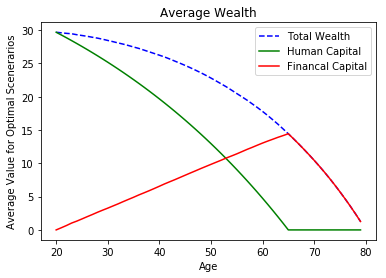

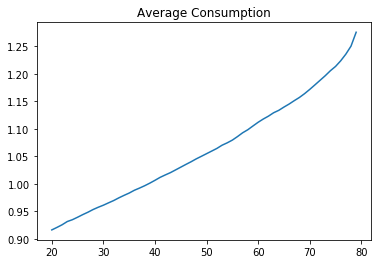

In [54]:
plt.plot(age,total_wealth,'b', linestyle= '--', label = 'Total Wealth')
plt.plot(age, H, 'g',label='Human Capital')
plt.plot(age, avg_f, 'r', label='Financal Capital')
plt.xlabel('Age')
plt.ylabel('Average Value for Optimal Scenerarios')
plt.legend()
plt.title('Average Wealth')
plt.show()

plt.plot(age, avg_c)
plt.title('Average Consumption')
plt.show()

_Case 1: change in relative risk aversion_

In the case of a bad measurement of the risk aversion by the pension fund ([To bad measurement of relative risk aversion](#Redefine the relative risk aversion parameter)), we can see that consumption and investment patterns change as well as utility decreases compared to the benchmark.

In [55]:
#Compute the new consumption and savings pattern

A_1 = ((1-θ_bad)*r-ρ)/θ_bad+0.5*((1-θ_bad)/θ_bad**2)*λ**2 

g_1 = []
for i in range(gridpoints):
    g_1.append((1/A_1)*(np.exp(A_1*(D-(age[i]-start_age)))-1)) 


C_1 = np.zeros((scenarios, gridpoints)) 
F_1 = np.zeros((scenarios, gridpoints)) 
fstar_1 = np.zeros((scenarios, gridpoints)) 
fstar_times_F_1 = np.zeros((scenarios, gridpoints))

for i in range(gridpoints):
    for j in range (scenarios):
    
        if i==0:
            F_1[j][i] = 0
      
            C_1[j][i] = (F_1[j][i] + H[i])*g[i]**(-1) 
            fstar_times_F_1[j][i] = (1/θ_bad)*(λ/σ)*(F_1[j][i]+H[i]) 
      
            fstar_1[j][i] = 'NaN'
   
        else:
            F_1[j][i] = F_1[j][i-1]+F_1[j][i-1]*r*dt + fstar_times_F_1[j][i-1]*σ*λ*dt+ fstar_times_F_1[j][i-1]*np.sqrt(dt)*σ*Z[j][i]+(Y[i-1]-C_1[j][i-1])*dt 
      
            C_1[j][i] = (F_1[j][i] + H[i])*g_1[i]**(-1) 
            fstar_times_F_1[j][i] = (1/θ_bad)*(λ/σ)*(F_1[j][i]+H[i]) 
      
            fstar_1[j][i] = fstar_times_F_1[j][i]/F[j][i] 


#Calculates utility over the lifecycle

U_case1 = sum(np.exp(-ρ*np.linspace(1,gridpoints,gridpoints))*np.mean((dt*(1/(1-θ))*C_1**(1-θ))))

After computing the new utility we can see that is lower compared with the benchmark.

In [56]:
utility_Δ_1 = U_case1 - U_benchmark
print('Utility case 1 = ', U_case1)
print('Benchmark utility =', U_benchmark)
print('Change in utility in case 1' , utility_Δ_1)

Utility case 1 =  -15.508675680365906
Benchmark utility = -11.42302175131089
Change in utility in case 1 -4.085653929055017


In the following graphs we can see the optimal patterns compared to the case of our analysis.

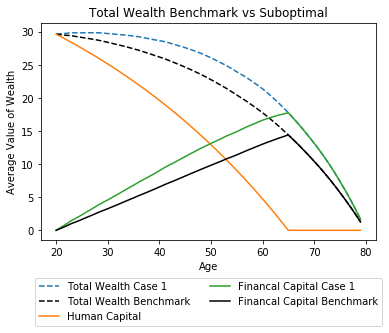

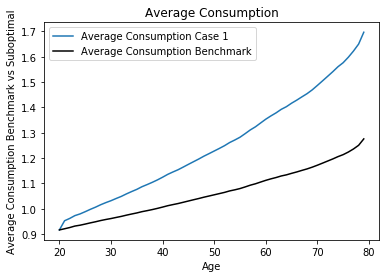

In [57]:
# Compute the average of consumption and financial assets of all scenarios

avg_c_1 = C_1.mean(0)
avg_f_1 = F_1.mean(0)
total_wealth_1 = H + avg_f_1

# Graph the changes in total wealth and consumption

plt.plot(age,total_wealth_1, linestyle= '--', label = 'Total Wealth Case 1')
plt.plot(age,total_wealth, 'k',linestyle= '--', label = 'Total Wealth Benchmark')
plt.plot(age, H, '', label='Human Capital')
plt.plot(age, avg_f_1, label='Financal Capital Case 1')
plt.plot(age, avg_f,'k', label='Financal Capital Benchmark')
plt.xlabel('Age')
plt.ylabel('Average Value of Wealth')
plt.title('Total Wealth Benchmark vs Suboptimal')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

plt.plot(age, avg_c_1, label ='Average Consumption Case 1')
plt.plot(age, avg_c, 'k', label ='Average Consumption Benchmark')
plt.title('Average Consumption')
plt.xlabel('Age')
plt.ylabel('Average Consumption Benchmark vs Suboptimal')
plt.legend()
plt.show()

_Case 2: change in time preference_

In the case of a bad measurement in time preference by the pension fund ([To bad measurement of time preference](#Redefine parameter of time preference)), we can see that consumption and investment patterns change as well as utility decreases compared to the benchmark.

In [58]:
#Compute the new consumption and savings pattern

A_2 = ((1-θ)*r-ρ_bad)/θ+0.5*((1-θ)/θ**2)*λ**2 

g_2 = []
for i in range(gridpoints):
    g_2.append((1/A_2)*(np.exp(A_2*(D-(age[i]-start_age)))-1))
    
    
C_2 = np.zeros((scenarios, gridpoints)) 
F_2 = np.zeros((scenarios, gridpoints)) 
fstar_2 = np.zeros((scenarios, gridpoints)) 
fstar_times_F_2 = np.zeros((scenarios, gridpoints))

for i in range(gridpoints):
    for j in range (scenarios):
    
        if i==0:
            F_2[j][i] = 0
      
            C_2[j][i] = (F_2[j][i] + H[i])*g_2[i]**(-1) 
            fstar_times_F_2[j][i] = (1/θ)*(λ/σ)*(F_2[j][i]+H[i]) 
      
            fstar_2[j][i] = 'NaN'
   
        else:
            F_2[j][i] = F_2[j][i-1]+F_2[j][i-1]*r*dt + fstar_times_F_2[j][i-1]*σ*λ*dt+ fstar_times_F_2[j][i-1]*np.sqrt(dt)*σ*Z[j][i]+(Y[i-1]-C_2[j][i-1])*dt 
      
            C_2[j][i] = (F_2[j][i] + H[i])*g_2[i]**(-1) 
            fstar_times_F_2[j][i] = (1/θ)*(λ/σ)*(F_2[j][i]+H[i]) 
      
            fstar_2[j][i] = fstar_times_F_2[j][i]/F[j][i] 


#Calculates utility over the lifecycle

U_case2 = sum(np.exp(-ρ*np.linspace(1,gridpoints,gridpoints))*np.mean((dt*(1/(1-θ))*C_2**(1-θ))))

After computing the new utility we can see that is lower compared with the benchmark.

In [59]:
utility_Δ_2 = U_case2 - U_benchmark
print('Utility case 2 = ', U_case2)
print('Benchmark utility =', U_benchmark)
print('Change in utility in case 2' , utility_Δ_2)

Utility case 2 =  -13.23019269280323
Benchmark utility = -11.42302175131089
Change in utility in case 2 -1.8071709414923411


In the following graphs we can see the optimal patterns compared to the case of our analysis.

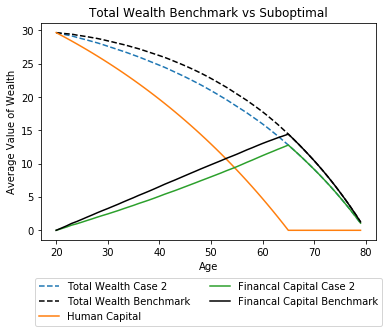

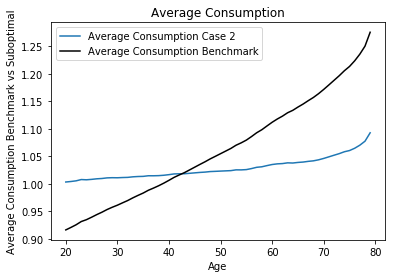

In [60]:
# Compute the average of consumption and financial assets of all scenarios

avg_c_2 = C_2.mean(0)
avg_f_2 = F_2.mean(0)
total_wealth_2 = H + avg_f_2

# Graph the changes in total wealth and consumption

plt.plot(age,total_wealth_2, linestyle= '--', label = 'Total Wealth Case 2')
plt.plot(age,total_wealth, 'k',linestyle= '--', label = 'Total Wealth Benchmark')
plt.plot(age, H, '', label='Human Capital')
plt.plot(age, avg_f_2, label='Financal Capital Case 2')
plt.plot(age, avg_f,'k', label='Financal Capital Benchmark')
plt.xlabel('Age')
plt.ylabel('Average Value of Wealth')
plt.title('Total Wealth Benchmark vs Suboptimal')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

plt.plot(age, avg_c_2, label ='Average Consumption Case 2')
plt.plot(age, avg_c, 'k', label ='Average Consumption Benchmark')
plt.title('Average Consumption')
plt.xlabel('Age')
plt.ylabel('Average Consumption Benchmark vs Suboptimal')
plt.legend()
plt.show()

<a id='Policy Implications'></a>
### 5- Policy Implications

_Case 1_

There are several potential policy implications of these results. Top of mind is the need to ensure that the incentives of the pension fund are aligned with the clients. For example, it may make sense for a pension fund to create a portfolio that is more (or less) risky depending on their business model. For instance, if the pension fund charges clients based on total assets and total growth, then it may make sense for the fund to invest in riskier assets, since that implies a larger payout for them. Or, if the pension fund is under political pressure to invest in lower yielding, but safer, government assets, this may also influence their investment decisions to the detriment of the welfare client. Therefore, the government can ensure that the clients needs are aligned with the incentives of the pension fund. There is also a role for public policy in setting defaults. For example, it may be beneficial for the government, or the social partner, to help determine the default rate of risk aversion that meets the needs of the widest range of clients. Or for example, in developing methods that ensures that risk aversion is being properly measured by the pension fund.

 

_Case 2_

Case two offers several important policy implications as well. Unlike with the parameter for risk aversion, the time preference has less to do with the pension fund investing assets, and more to do with individuals consumption patterns. From a policy perspective, the government can help determine default time preference for pension fund that would meet the needs of the majority of their clients. While we didn’t do the analysis here, there is probably more risk associated with a high rate of time preference, then a low rate. In other words, it’s probably better for the default option to be a low rate of time preference then a high rate since this would ensure a higher savings rate earlier in life, and a larger pension benefit later in life. Another role for policy is ensuring that pension funds take their clients time preference into consideration when they are planning contribution limits. For example, a person with a higher time preference may benefit from different policies such as flexibility in contribution rates, or a contribution holiday. Instead of imposing a low rate of time preference on their clients when planning contribution limits, a pension fund can offer some flexibility instead. This will help ensure adequate contributions. Finally, there can also be a role for policy in ensuring adequate knowledge about the implications of a high rate of time preference. For example, even if a person indicates they have an unusually higher rate of time preference (10% for example), it would not be beneficial for them to spend most of their assets during their working life. Instead, if the pension fund can demonstrate the effect of the time preference on pension outcomes, they may be able to help lower it, which would potentially bring welfare gains during retirement.

<a id='Conclusion'></a>
### 6- Conclusion

Pension design has clear welfare implications. Each person is different, there is no ‘correct’ parameters for risk aversion, or time preference, but it's important that the pension fund is best aligned to the needs of their participants. There is definitive role for public policy in this area. For example by setting defaults, ensuring that pension funds take their clients preferences into account, and ensuring that the incentives of the pension fund are aligned with the needs of their clients.